<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузим-данные-из-файлов-и-изучим-их" data-toc-modified-id="Загрузим-данные-из-файлов-и-изучим-их-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузим данные из файлов и изучим их</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-признаки-и-целевой-признак" data-toc-modified-id="Разделение-данных-на-признаки-и-целевой-признак-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных на признаки и целевой признак</a></span></li><li><span><a href="#Разделение-данных-на-обучающую-и-валидационную-выборку" data-toc-modified-id="Разделение-данных-на-обучающую-и-валидационную-выборку-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Разделение данных на обучающую и валидационную выборку</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><li><span><a href="#Подготовка-расчетных-переменных" data-toc-modified-id="Подготовка-расчетных-переменных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка расчетных переменных</a></span></li><li><span><a href="#Расчет-минимального-количества-баррелей-для-безубыточной-разработки." data-toc-modified-id="Расчет-минимального-количества-баррелей-для-безубыточной-разработки.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Расчет минимального количества баррелей для безубыточной разработки.</a></span></li><li><span><a href="#Расчет-прибыли-с-лучших-200-точек" data-toc-modified-id="Расчет-прибыли-с-лучших-200-точек-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет прибыли с лучших 200 точек</a></span></li></ul></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span><ul class="toc-item"><li><span><a href="#Расчет-Bootstrap" data-toc-modified-id="Расчет-Bootstrap-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет Bootstrap</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

**Описание проекта:**

Для нефтедобывающей компании ГРГН нужно определить самый выгодный для разработки регион. Нужно построить модель, которая исходя из исходных данных сможет выполнить задачу. Далее нужно проанализировать прибыль и подвести итоги исследования.

**Известные данные:**

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек;
- product — объём запасов в скважине (тыс. баррелей).

### Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
mean_squared_error,
r2_score,
mean_absolute_error
)


import warnings
warnings.filterwarnings('ignore')

### Загрузим данные из файлов и изучим их

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
except:
    data_0 = pd.read_csv('geo_data_0.csv')
    
try:
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
except:
    data_1 = pd.read_csv('geo_data_1.csv')
    
try:
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    data_2 = pd.read_csv('geo_data_2.csv')  

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_0.duplicated().sum()

0

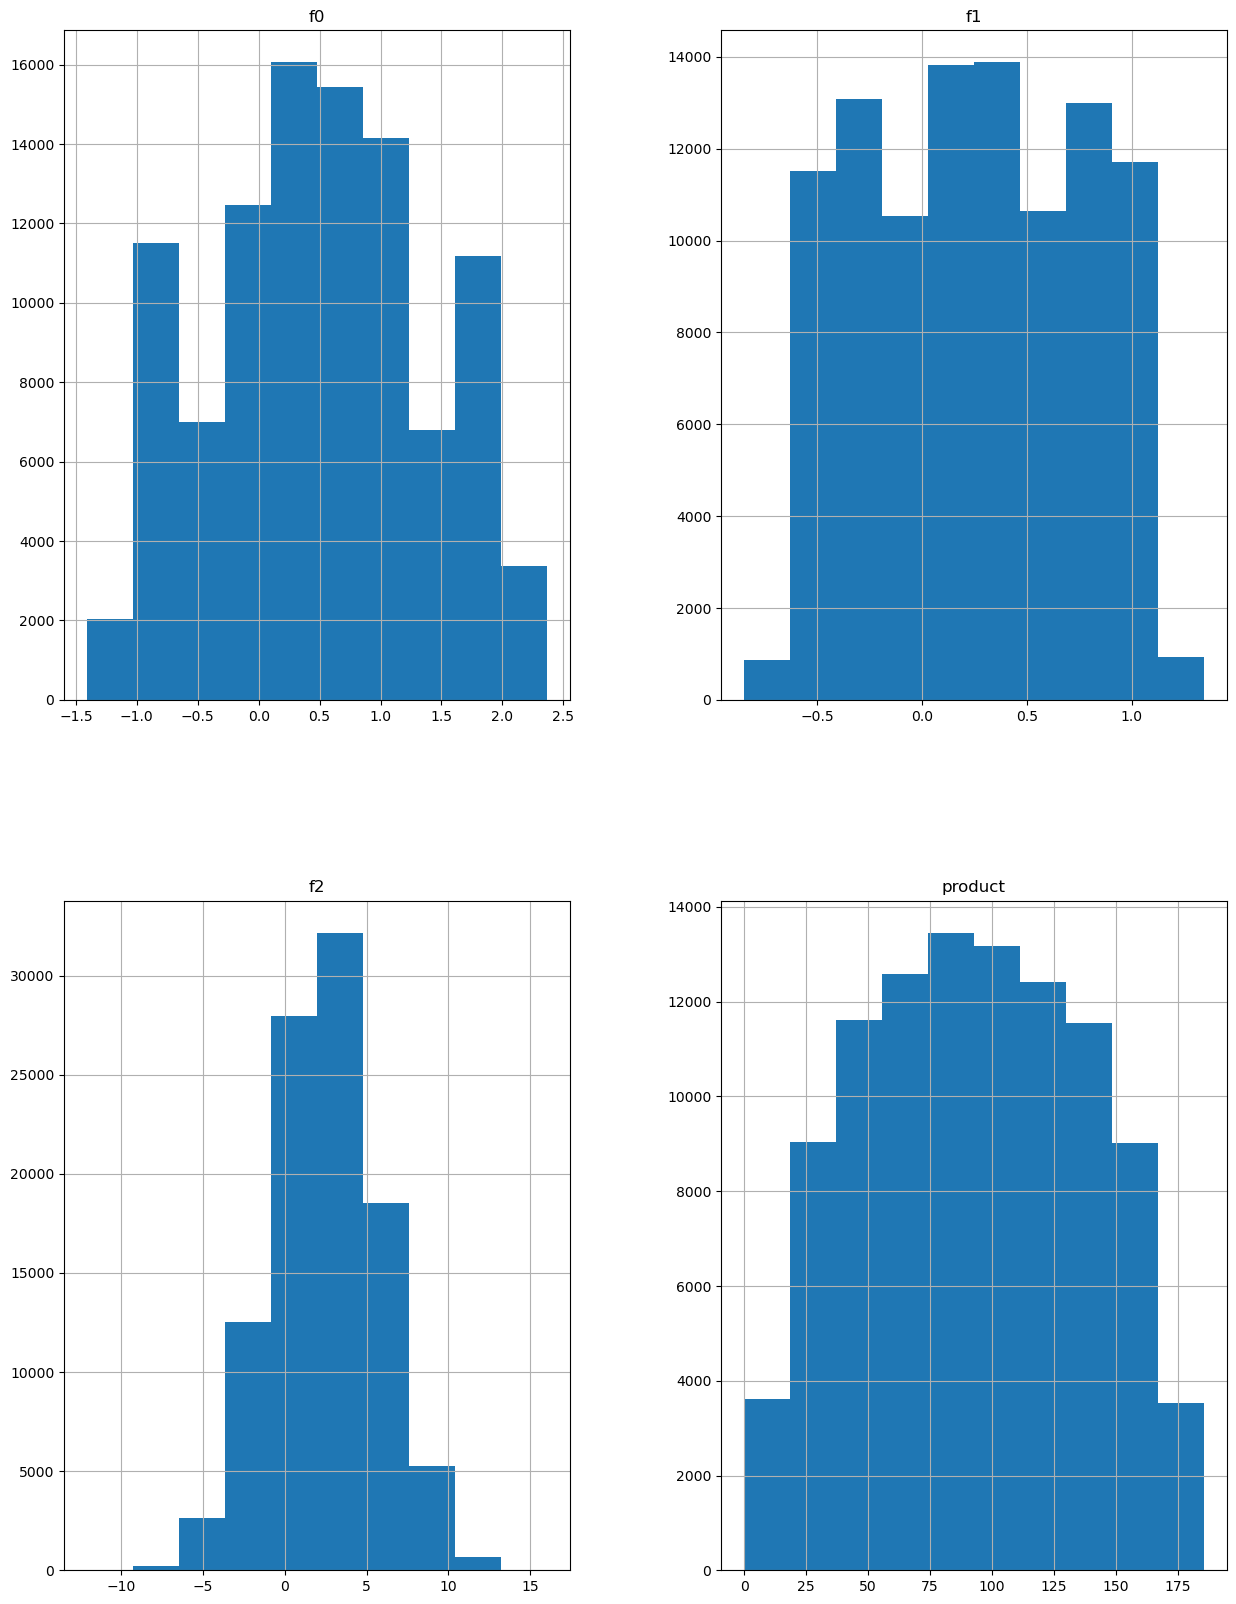

In [6]:
data_0.hist(figsize=(15, 20));

In [7]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_1.duplicated().sum()

0

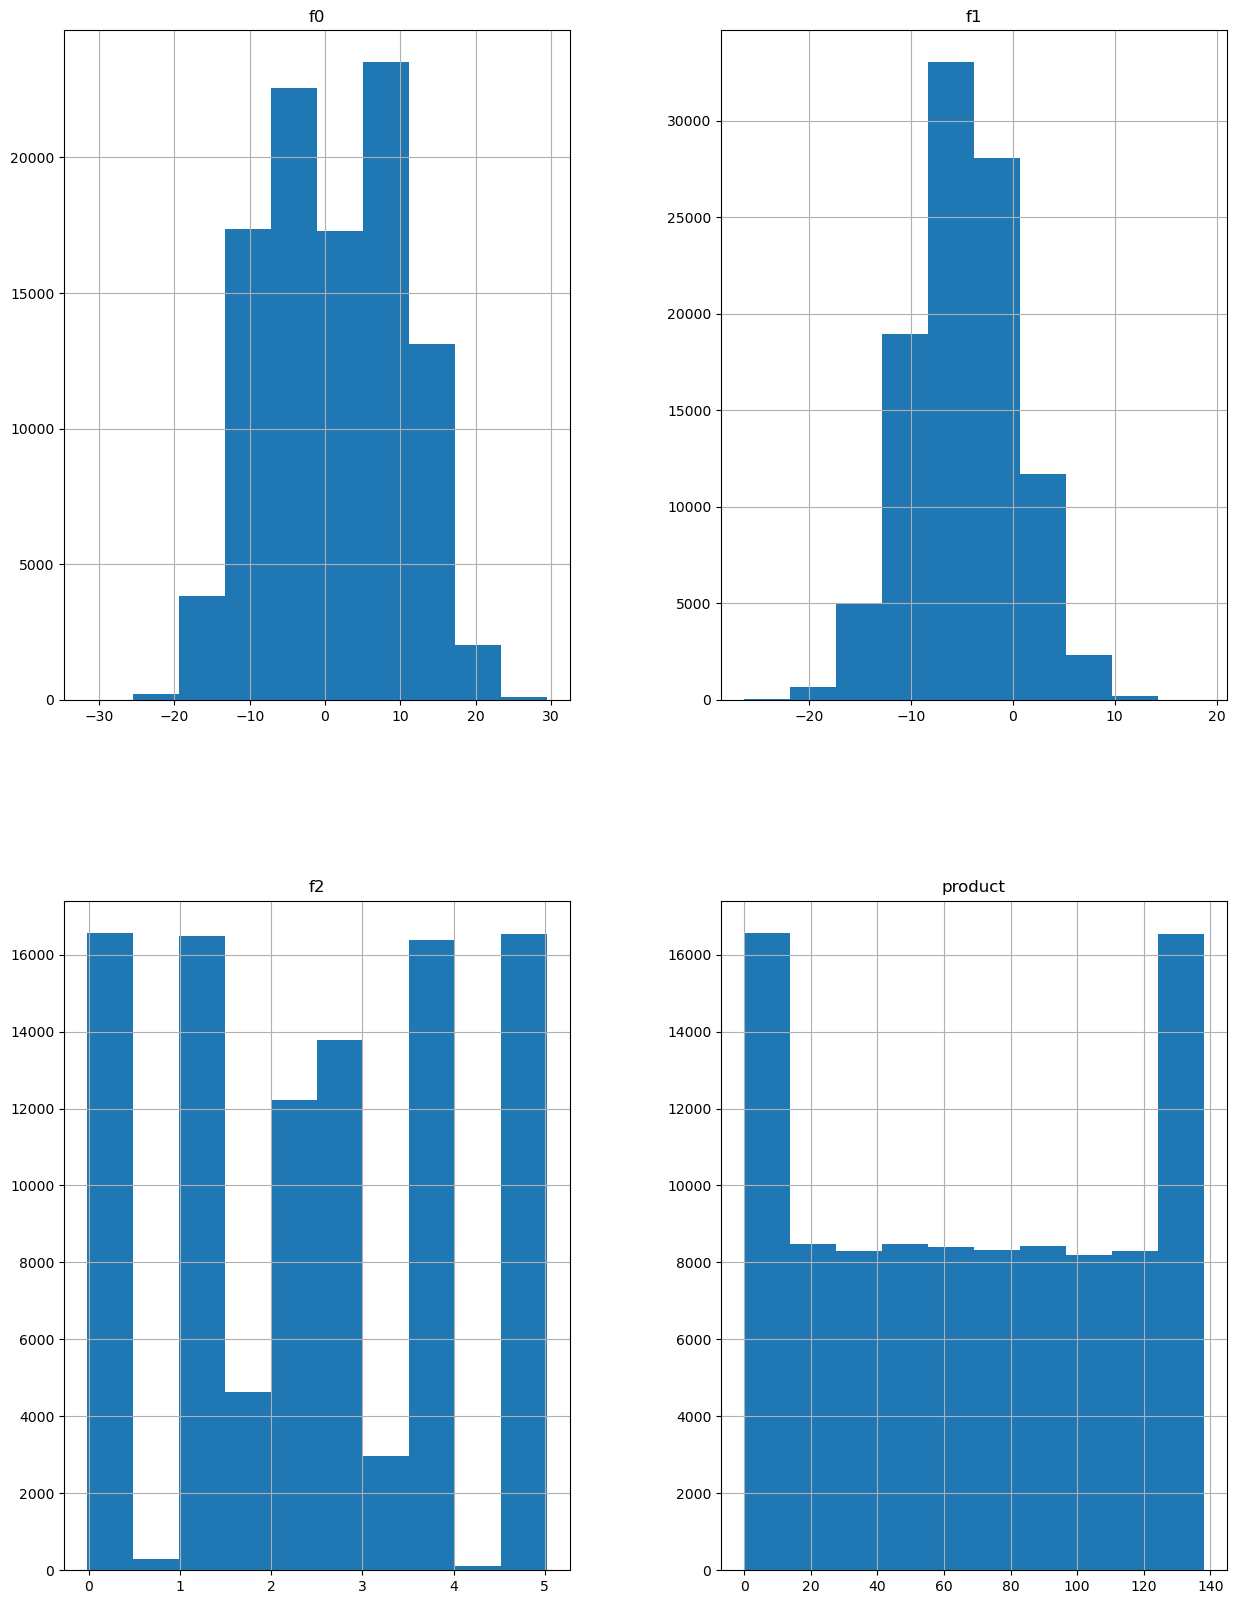

In [10]:
data_1.hist(figsize=(15, 20));

In [11]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [12]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
data_2.duplicated().sum()

0

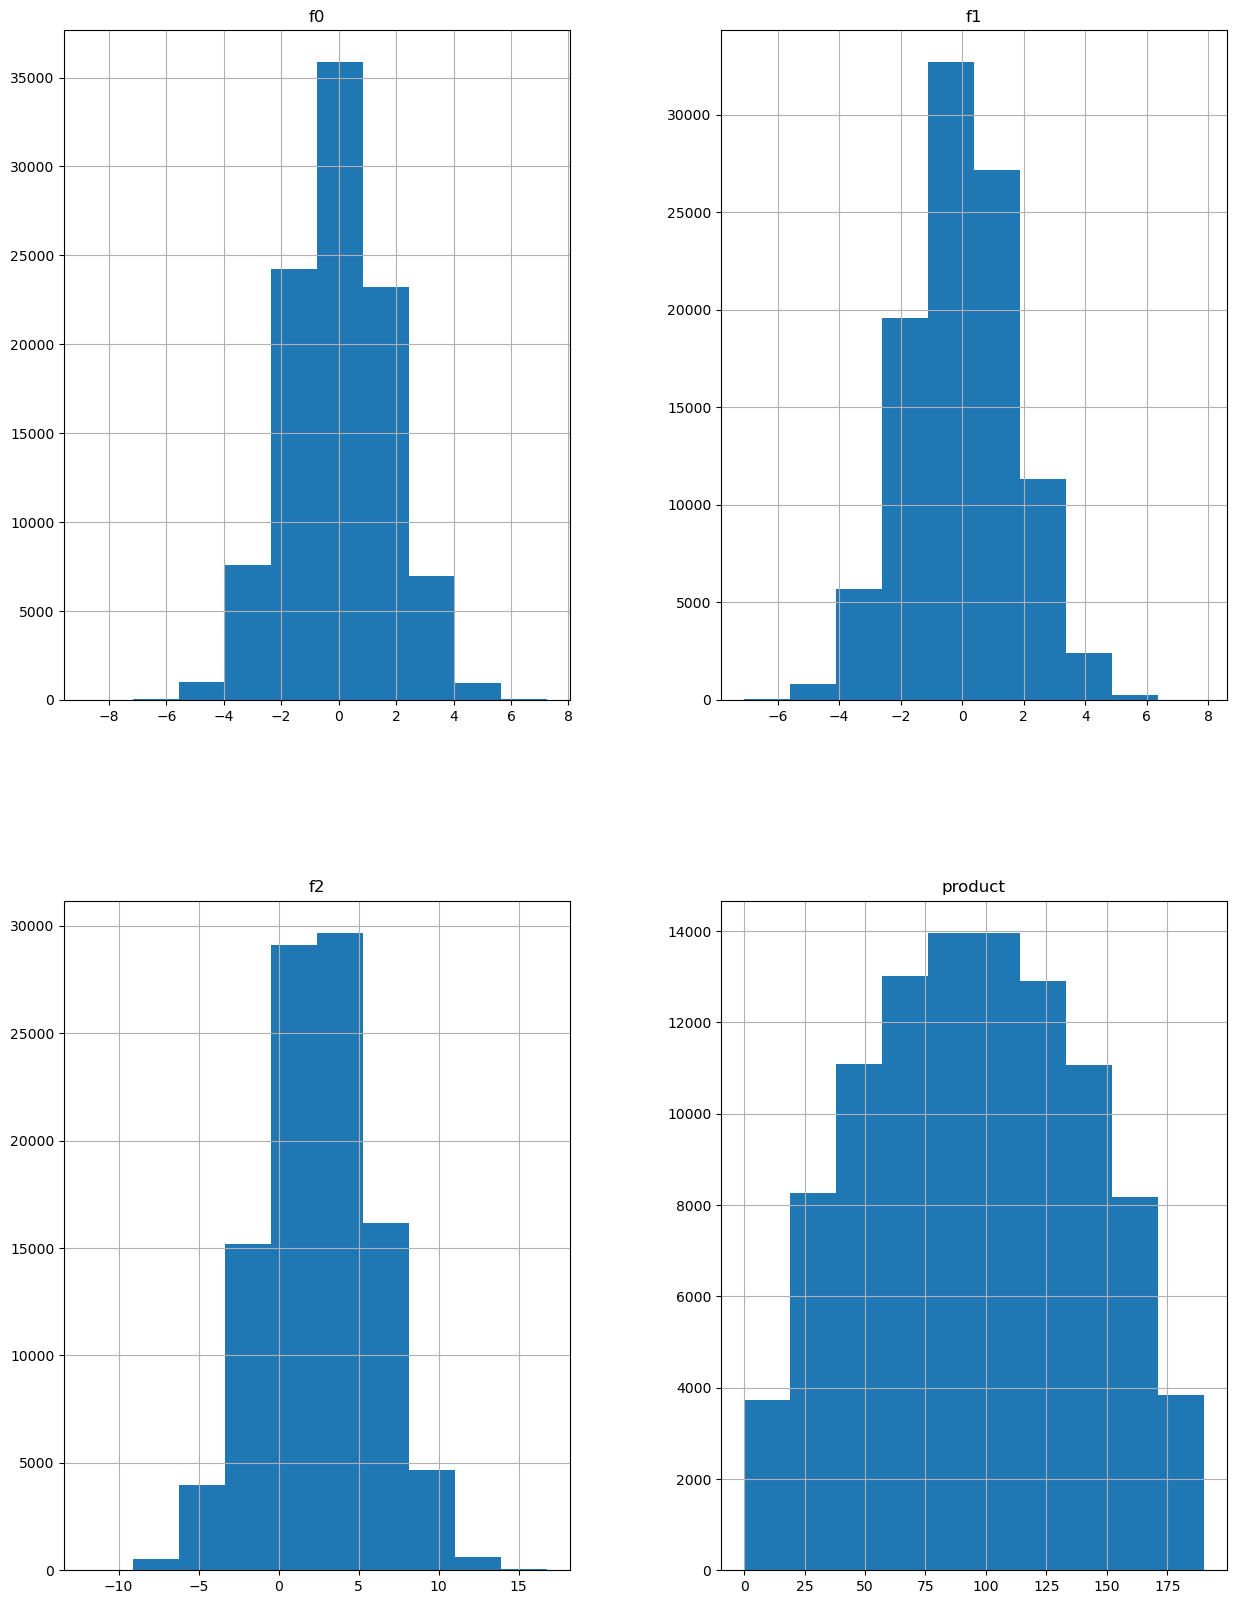

In [14]:
data_2.hist(figsize=(15, 20));

Файлы были успешно загружены и проверены на наличие ошибок. Все три файла не имеют пропусков, дубликатов, также не имеют ошибок в типах данных. Распределение данных равномерное, без перекосов, с редкими пиками.

**Вывод:** Таблица была доработана и подготовлена к дальнейшей работе.

## Обучение и проверка модели

### Разделение данных на признаки и целевой признак

- **product** - целевой признак\
- **f0, f1, f2** - признаки

In [15]:
feature_all = ['f0', 'f1', 'f2']
target_all = ['product']

In [16]:
feature_0 = data_0[feature_all]
target_0 = data_0[target_all]
feature_1 = data_1[feature_all]
target_1 = data_1[target_all]
feature_2 = data_2[feature_all]
target_2 = data_2[target_all]

### Разделение данных на обучающую и валидационную выборку

In [17]:
# Выборка региона 1:
feature_0_train, feature_0_valid, target_0_train, target_0_valid = train_test_split(feature_0, target_0, test_size=0.25, random_state=12345)
# Выборка региона 2:
feature_1_train, feature_1_valid, target_1_train, target_1_valid = train_test_split(feature_1, target_1, test_size=0.25, random_state=12345)
# Выборка региона 3:
feature_2_train, feature_2_valid, target_2_train, target_2_valid = train_test_split(feature_2, target_2, test_size=0.25, random_state=12345)

In [18]:
print('Распределение:')
print('Регион 1:')
print('feature_0_train:', feature_0_train.shape, 'feature_0_valid:', feature_0_valid.shape)
print('target_0_train:', target_0_train.shape, 'target_0_valid:', target_0_valid.shape)
print('/////////////////////////////////////////////////////')
print('Регион 2:')
print('feature_1_train:', feature_1_train.shape, 'feature_1_valid:', feature_1_valid.shape)
print('target_1_train:', target_1_train.shape, 'target_1_valid:', target_1_valid.shape)
print('/////////////////////////////////////////////////////')
print('Регион 3:')
print('feature_2_train:', feature_2_train.shape, 'feature_2_valid:', feature_2_valid.shape)
print('target_2_train:', target_2_train.shape, 'target_2_valid:', target_2_valid.shape)

Распределение:
Регион 1:
feature_0_train: (75000, 3) feature_0_valid: (25000, 3)
target_0_train: (75000, 1) target_0_valid: (25000, 1)
/////////////////////////////////////////////////////
Регион 2:
feature_1_train: (75000, 3) feature_1_valid: (25000, 3)
target_1_train: (75000, 1) target_1_valid: (25000, 1)
/////////////////////////////////////////////////////
Регион 3:
feature_2_train: (75000, 3) feature_2_valid: (25000, 3)
target_2_train: (75000, 1) target_2_valid: (25000, 1)


### Обучение моделей

In [19]:
# Выборка региона 1:
model_0 = LinearRegression()
model_0.fit(feature_0_train, target_0_train)
predict_0 = model_0.predict(feature_0_valid)
rmse_0 = mean_squared_error(target_0_valid, predict_0)**0.5
r2_0 = r2_score(target_0_valid, predict_0)
mae_0 = mean_absolute_error(target_0_valid, predict_0)
predict_level_sum_0 = predict_0.sum().round(2)
predict_level_mean_0 = predict_0.mean().round(2)

In [20]:
print('Метрики региона 1:')
print('RMSE:', rmse_0)
print('R2:', r2_0)
print('MAE:', mae_0)
print('Предполагаемый уровень запасов:', predict_level_sum_0)
print('Среднее значение уровня запасов:', predict_level_mean_0)

Метрики региона 1:
RMSE: 37.5794217150813
R2: 0.27994321524487786
MAE: 30.919600777151313
Предполагаемый уровень запасов: 2314814.19
Среднее значение уровня запасов: 92.59


In [21]:
# Выборка региона 2:
model_1 = LinearRegression()
model_1.fit(feature_1_train, target_1_train)
predict_1 = model_1.predict(feature_1_valid)
rmse_1 = mean_squared_error(target_1_valid, predict_1)**0.5
r2_1 = r2_score(target_1_valid, predict_1)
mae_1 = mean_absolute_error(target_1_valid, predict_1)
predict_level_sum_1 = predict_1.sum().round(2)
predict_level_mean_1 = predict_1.mean().round(2)

In [22]:
print('Метрики региона 2:')
print('RMSE:', rmse_1)
print('R2:', r2_1)
print('MAE:', mae_1)
print('Предполагаемый уровень запасов:', predict_level_sum_1)
print('Среднее значение уровня запасов:', predict_level_mean_1)

Метрики региона 2:
RMSE: 0.8930992867756168
R2: 0.9996233978805127
MAE: 0.7187662442124758
Предполагаемый уровень запасов: 1718213.67
Среднее значение уровня запасов: 68.73


In [23]:
# Выборка региона 3:
model_2 = LinearRegression()
model_2.fit(feature_2_train, target_2_train)
predict_2 = model_2.predict(feature_2_valid)
rmse_2 = mean_squared_error(target_2_valid, predict_2)**0.5
r2_2 = r2_score(target_2_valid, predict_2)
mae_2 = mean_absolute_error(target_2_valid, predict_2)
predict_level_sum_2 = predict_2.sum().round(2)
predict_level_mean_2 = predict_2.mean().round(2)

In [24]:
print('Метрики региона 3:')
print('RMSE:', rmse_2)
print('R2:', r2_2)
print('MAE:', mae_2)
print('Предполагаемый уровень запасов:', predict_level_sum_2)
print('Среднее значение уровня запасов:', predict_level_mean_2)

Метрики региона 3:
RMSE: 40.02970873393434
R2: 0.20524758386040443
MAE: 32.792652105481814
Предполагаемый уровень запасов: 2374126.15
Среднее значение уровня запасов: 94.97


**Вывод:** Среди всех регионов, первый и третий показывают лучший вариант по предсказанному результату - **94** и **92** тысячи баррелей в среднем на точку. Второй показывает более низкие цифры - **68**. Согласно метрике **RMSE**, уровень отклонения предсказания модели составляет **37** и **40**, для первого региона и третьего соответсвенно. Это говорит в пользу первого региона. Уровень метрики **R2** у регионов примерно одинаковое, что говорить о примерно одинаковом уровня среднеквадратичной ошибки в метриках регионов. Уровень **MAE** также равен - 30 против 32 первого и третьего региона соотв.

В целом, первый регион подает более оптимистичные цифры для дальнейшей работы. Несмотря на то, что третий имеет больший уровень потенциального запаса, первый более точно предсказывает его наличие в принципе.

## Подготовка к расчёту прибыли

### Подготовка расчетных переменных

In [25]:
random_points = 500
best_points = 200
budget = 10000000000
profit_barrel = 450
profit_barrel_1 = 450000
losses = 0.025
bootstrap = 1000


### Расчет минимального количества баррелей для безубыточной разработки.

Затраты на разработку одной скважины:

In [26]:
expenses_one_well = budget / best_points

Необходимое количество сырья для компенсации затрат на разработку:

In [27]:
number_barrels_development = expenses_one_well / profit_barrel_1

In [28]:
print('Минимальное количество сырья для компенсации разработки:', number_barrels_development)

Минимальное количество сырья для компенсации разработки: 111.11111111111111


### Расчет прибыли с лучших 200 точек

Напишем функцию подсчета прибыли с лучших 200 точек:

In [29]:
def profit(predict):
    predict = pd.Series(*predict.reshape(1,-1))
    predict_sort = predict.sort_values(ascending=False).head(200)
    profit_1 = (predict_sort.sum() * profit_barrel_1) - budget
    return profit_1

In [30]:
print('Прибыль:')
print('Регион 1', profit(predict_0))
print('Регион 2', profit(predict_1))
print('Регион 3', profit(predict_2))

Прибыль:
Регион 1 3996048877.46513
Регион 2 2485712051.973549
Регион 3 3321754396.243252


**Вывод:** Необходимый объем сырья требующийся для окупаемости одной скважины равен 111 тысяч барелей нефти. Это на 15 - 20 тысяч больше чем могут обеспечить сами скважины по себе в среднем. Тем не менее в выборке есть точки свыше данного лимита, что говорит нам позитивная прибыль с добычи. В данных условиях разрабатывать точки составляющее подавляющее количество от общей суммы, с минимальной добычей менее 111 тысяч баррелей не целеобразно.

Первый регион показывает самый высокий уровень прибыли, что делает его достаточно перспективным объектом для вложения средств. Это также подтверждает предыдущий вывод, где показатели предсказания модели также указывали на его приоритет. 

## Расчёт прибыли и рисков 

### Расчет Bootstrap

**Напишем функцию расчета прибыли по Bootstrap**

In [31]:
def profit (target, predict):
    target_upd = pd.Series(target['product']).reset_index(drop=True)
    predict_upd = pd.Series(*predict.reshape(1,-1))
    for i in range(1000):
        predict_subsample = predict_upd.reset_index(drop=True).sample(500, replace=True, random_state=state)
        pred_choice = predict_subsample.sort_values(ascending=False)[:200]
        probs_subsample = target_upd[pred_choice.index]
        profit = (probs_subsample.sum() * profit_barrel_1) - budget
        values.append(profit)
    return values    

**Bootstrap первого региона:**

In [32]:
state = np.random.RandomState(12345)
percent_0 = 0
values = []

In [33]:
profit_0 = profit(target_0_valid, predict_0)

In [34]:
values_0 = pd.Series(values)
values_0 = values_0.mean()

In [35]:
for i in values:
    if i < 0:
        percent_0 +=1
percent_00 = (percent_0 / 1000) * 100

In [36]:
values_quantile_0 = pd.Series(values) 
lower_0 = values_quantile_0.quantile(0.025) 
upper_0 = values_quantile_0.quantile(0.975)
lower_upper_0 = (lower_0 + upper_0) / 2

In [37]:
print('Регион 1:')
print('Средняя прибыль:', values_0 / 1000000, 'млн. рублей')
print('Риск убытков:', percent_00,'%')
print('Доверительный интервал 0.025%:', lower_0 / 1000000)
print('Доверительный интервал 0.975%:', upper_0 / 1000000)
print('Доверительный интервал 95%:', lower_upper_0 / 1000000)

Регион 1:
Средняя прибыль: 396.164984802371 млн. рублей
Риск убытков: 6.9 %
Доверительный интервал 0.025%: -111.21554589049525
Доверительный интервал 0.975%: 909.7669415534226
Доверительный интервал 95%: 399.2756978314636


**Bootstrap второго региона:**

In [38]:
percent_1 = 0
values = []

In [39]:
profit_1 = profit(target_1_valid, predict_1)

In [40]:
values_1 = pd.Series(values)
values_1 = values_1.mean()

In [41]:
for i in values:
    if i < 0:
        percent_1 +=1
percent_11 = (percent_1 / 1000) * 100

In [42]:
values_quantile_1 = pd.Series(values) 
lower_1 = values_quantile_1.quantile(0.025) 
upper_1 = values_quantile_1.quantile(0.975)
lower_upper_1 = (lower_1 + upper_1) / 2

In [43]:
print('Регион 2:')
print('Средняя прибыль:', values_1 / 1000000, 'млн. рублей')
print('Риск убытков:', percent_11,'%')
print('Доверительный интервал 0.025%:', lower_1 / 1000000)
print('Доверительный интервал 0.975%:', upper_1 / 1000000)
print('Доверительный интервал 95%:', lower_upper_1 / 1000000)

Регион 2:
Средняя прибыль: 461.15581727723986 млн. рублей
Риск убытков: 0.7000000000000001 %
Доверительный интервал 0.025%: 78.05081075174171
Доверительный интервал 0.975%: 862.9520602637234
Доверительный интервал 95%: 470.50143550773254


**Bootstrap третьего региона:**

In [44]:
percent_2 = 0
values = []

In [45]:
profit_2 = profit(target_2_valid, predict_2)

In [46]:
values_2 = pd.Series(values)
values_2 = values_2.mean()

In [47]:
for i in values:
    if i < 0:
        percent_2 +=1
percent_22 = (percent_2 / 1000) * 100

In [48]:
values_quantile_2 = pd.Series(values) 
lower_2 = values_quantile_2.quantile(0.025) 
upper_2 = values_quantile_2.quantile(0.975)
lower_upper_2 = (lower_2 + upper_2) / 2

In [49]:
print('Регион 3:')
print('Средняя прибыль:', values_2 / 1000000, 'млн. рублей')
print('Риск убытков:', percent_22,'%')
print('Доверительный интервал 0.025%:', lower_2 / 1000000)
print('Доверительный интервал 0.975%:', upper_2 / 1000000)
print('Доверительный интервал 95%:', lower_upper_2 / 1000000)

Регион 3:
Средняя прибыль: 392.95047517060374 млн. рублей
Риск убытков: 6.5 %
Доверительный интервал 0.025%: -112.22762537857565
Доверительный интервал 0.975%: 934.5629145511635
Доверительный интервал 95%: 411.16764458629393


**Вывод:** Рассчитав Bootstrap выяснили, что самый высокий показатель средней прибыли мы можем получить во втором регионе - **461 млн. рублей**. Ранее расчитав в данном регионе прибыль с 200 самых лучших точек, был получен более низкий результат - **248 млн. рублей**. Второе и третье место занял первый и третий регионы, с показателем средней прибыли равной: **396 млн. рублей** и **395 млн. рублей** соответственно.

Изначально, момент работы моделей, первый регион показал более оптимистичные цифры с уровнем **RMSE = 37** и предполагаемым средним уровнем запасов **92 тысячи баррель.** Что выгодно отличало его на фоне других регионов, где потенциал был значительно меньше. Также сама модель получилась наиболее точной, что позволяет предположить о действительном наличии потенциала в регионе. 
Также стоить упомянуть уровень рисков в первом регионе - **6,9%**, что в совокупности оптимистичной модели, мы можем предполагать о реалистичности полученных рисков.

Самым оптимальным вариантом для нас выглядит второй регион, так как его разработка имеет минимальные риски, самую большую среднюю прибыль, и приемлемый уровень доверительного интервала, где самая нижняя планка остается в плюсе.

Единственный момент, который заставляет сомневаться во втором регионе - это самый низкий уровень потенциала, относительно остальных: 69 тысяч баррель, против 93 и 95 на точку. Значения средние и имеет место разброс, но так или иначе в целом второй регион менее богат, но его прибыльнее разрабатывать. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован